<a href="https://colab.research.google.com/github/Hernanros/Y-data-DL/blob/HW%231-answers/HW%231_basic%20NN/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Theoretical Aspects - Assignment 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


**A:**The summation of many linear functions will always still give us just another linear function. If we use only linear activtion functions, then each new layer is a product of a linear combination of linear functions. As such, any N layer NN with a linear activation function can be simplified into one long linear regression problem - represented as a linear function.

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">

**B:**
$$f(t)'=\frac{e^{-t}}{(1+e^{-t})^{-2}}$$<br>
$$f(t)'=\frac{1}{1+e^{-t}}\frac{e^{-t}}{1+e^{-t}}$$<br>
$$\frac{e^{-t}}{1+e^{-t}}=\frac{e^{-t}+1-1}{1+e^{-t}}$$<br>
$$\frac{e^{-t}}{1+e^{-t}}=\frac{1+e^{-t}}{1+e^{-t}}-\frac{1}{1+e^{-t}}$$<br>
$$\frac{e^{-t}}{1+e^{-t}}=1-\sigma(t)$$<br>
$$f(t)'=\sigma(t)(1-\sigma(t))$$

2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">

**ReLu derivative**
$$f(x)=
\begin{cases} 
0 & \text{if  }  x < 0 \\
x & \text{if  }  x \geq 0 \\
\end{cases}$$<br>
$$f'(x)=
\begin{cases} 
0 & \text{if  }  x < 0 \\
1 & \text{if  }  x \geq 0 \\
\end{cases}$$

3 Softmax
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3" width="250">

In [0]:
# Write your answer here

**Softmax derivative**
$$
\begin{cases} 
g'(z) = e^{z_j} & \text{when  }  g(z) = e^{z_j} \\
h'(z) = e^{z_j} &\text{when  }  ‎‎h(z)‎ = {{‎‎\sum}}_{k=1}^{K}e^{z_k}‎‎
 \\
\end{cases}$$<br>
$$\sigma(z)_j'=\frac{g'(z)h(z)-g(z)h'(z)}{h(z)^2}$$<br>

[some messy calculus](https://aimatters.wordpress.com/2019/06/17/the-softmax-function-derivative/)<br>

$$\sigma(z)_j'=\sigma(z)(1-\sigma(z))$$



### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations:

```
z = x1 + 5*x2 - 3*x3^2
```

$$z'=x_1^{1-1}+3x_2^{1-1}+3*2*x_3^{2-1}$$
$$z'=4+6x_3$$

```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

$$z'=[x_1'*(x_2-4)+x_1*(x_2-4)']+[exp(x_3^2)'*5x_4^{-2}+(exp(x_3^2)*5x_4^{-2})']$$
$$z'=1*x_2-4+x_1*(1-0)+\frac{exp(x_3^2)}{5x_4^2}+\frac{exp(x_3^2)}{-15x_4^{-3}}$$
$$z'=x_1+x_2+\frac{exp(x_3^2)}{5x_4^2}-\frac{exp(x_3^2)}{-15x_4^{-3}}$$

```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

$$z'=-2x_3^{-2}+exp((x_1+5)*(x_2+3)^2)$$

### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

#### Apply to arrays
Apply the convolutions above to the following array:


In [0]:
from scipy.signal import convolve2d
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])



In [0]:
k1=np.array( ([ [0, 0, 0], [0, 1 ,0], [0 ,0 ,0]]) )
convolve2d(x,k1,'valid')

array([[-2, -4,  0],
       [-2,  2,  2],
       [-3, -4, -4]])

In [0]:
k2=np.array( ([ [0, 0, 0], [0, 0 ,1], [0 ,0 ,0]]) )
convolve2d(x,k2,'valid')

array([[ 2, -2, -4],
       [-3, -2,  2],
       [ 0, -3, -4]])

In [0]:
#since the implementation of the convolution algorithm from scipy mirrors the filter window, 
#we need to feed it with an opposite filter window

k2_5=np.zeros((k1.shape))
k2_5[1,0]=1
convolve2d(x,k2_5,'valid')

array([[-4.,  0., -2.],
       [ 2.,  2.,  3.],
       [-4., -4., -2.]])

In [0]:
k3=np.array( ([ [-1, -1, -1], [-1, 8 ,-1], [-1 ,-1 ,-1]]) )
convolve2d(x,k3,'valid')

array([[ -3, -25,   4],
       [ -4,  33,  27],
       [-13, -27, -36]])

In [0]:
k4=np.array( ([ [1, 1, 1], [1, 1 ,1], [1 ,1 ,1]]) )/9
convolve2d(x,k4,'valid')

array([[-1.66666667e+00, -1.22222222e+00, -4.44444444e-01],
       [-1.55555556e+00, -1.66666667e+00, -1.00000000e+00],
       [-1.55555556e+00, -1.00000000e+00,  5.55111512e-17]])

### answer
$k_1$ returrns the identity value of the cell loacted in the center of the matrix, since convelution reduce the amount of output comparing to the input by $2m+2n-4$ where $m$ is the number of rows and $n$ the number of columns, running this convelution will crop the centeral 3*3 values

$$Xk1=\begin{bmatrix}-2&-4&0\\-2& 2& 2\\-3&-4&-4\end{bmatrix}$$

$k_2$ returrns the identity value of the cell loacted in the center right of each filtered window, running this convelution will crop the 3 most right columns in the 3 central rows


$$Xk2=\begin{bmatrix}-4&0&-2\\2& 2& 3\\-4&-4&-2\end{bmatrix}$$

$k3$ returns the differnce betwween the central cell in the window and the sum of the peripherial, giving a value that indicates how different is the central pixel from it's surrounding

$$Xk3=\begin{bmatrix}-3&-25&-4\\-4& 33& 27\\-13&-27&-36\end{bmatrix}$$

$k4$ returns the average of the window
$$Xk4=\begin{bmatrix}-1.67&-1.22&-0.44\\-1.55& -1.67& -1\\-1.55&-1&0\end{bmatrix}$$



What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

### answers
1. 3X3
2. 2X2
3. 5X5
4. 3X3

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

### Answer
we need the width of the filter X stride to be a product of the width of the original input

$$s(f+2p)\%w=0$$


$$Product(width) = \frac{w-f+2p}{s}+1$$ (from slides)
where $w$ is the width of the input matrix, $f$ is the width of the filter, $p$ is amount of zero-padding layers and $s$ is stride size

#### Apply to images
Apply the convolution filters above on the image. Plot the results:

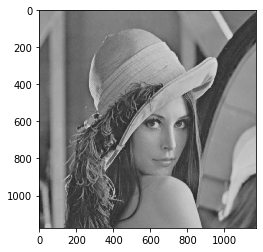

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im)

In [0]:
im.shape

(1175, 1170, 3)

In [0]:
def convlove_im(im,kernel):  
  convolved=np.zeros((im.shape))
  for dim in range(3):
    convolved[:,:,dim]= convolve(im[:,:,dim],kernel)
  return convolved.astype(int)

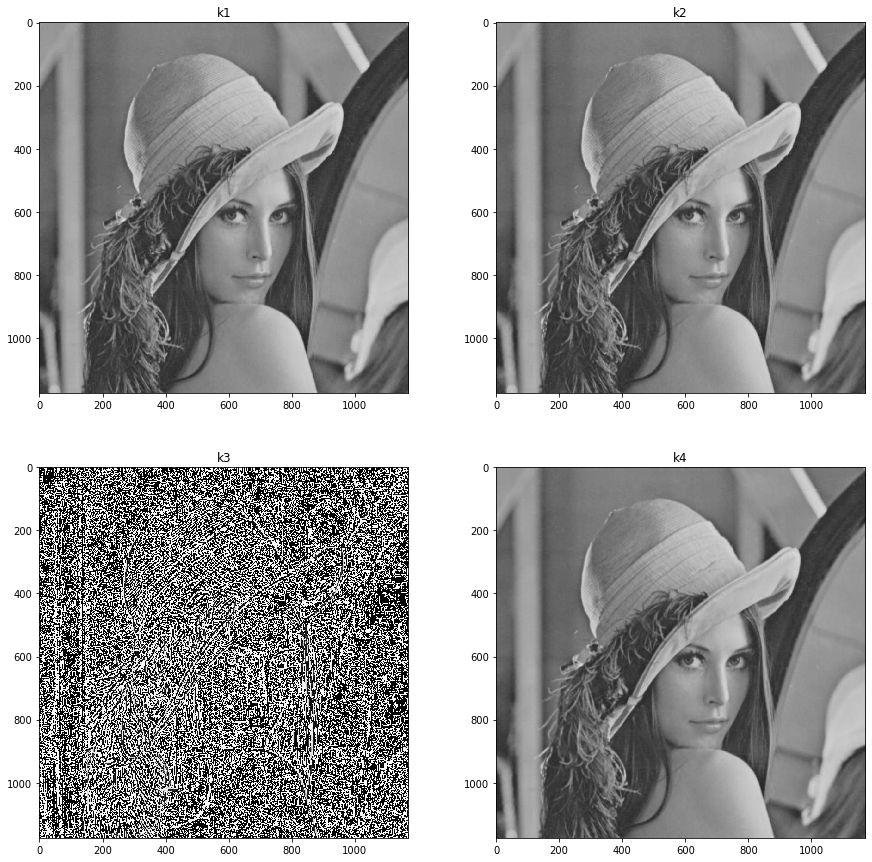

In [0]:
from scipy.ndimage import convolve

f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(convlove_im(im,k1))
plt.title('k1')
plt.subplot(2,2,2)
plt.title('k2')
plt.imshow(convlove_im(im,k2))
plt.subplot(2,2,3)
plt.title('k3')
plt.imshow(convlove_im(im,k3))
plt.subplot(2,2,4)
plt.title('k4')
plt.imshow(convlove_im(im,k4))


### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


**A:**
assuming we don't use zero padding at all:
input dimensions = 28X28X1 (grey photos)
- layer #1 dimension= 24X24X32 (32 convulution with filter width of 5). <br>
- params between input layer and layer #1 - (5X5+1)X32 <br>

- layer #2 dimension after pooling  12X12X32 . <br>

- layer #3 dimension after convolution - 8X8X64 <br>
- params between layer #2 and layer #3 - (5X5+1)X32X64 <br>
- layer # 4 dimensions after pooling - 4X4X64 <br>
- layer # 5 dimensions - 1024X1 <br>
- params between layer #4 and layer #4 - (4X4)X64X1024 <br>
- output layer dimensions - 10X1<br>

In [0]:
# Write your answer here

### Learning in biological neurons
Try to come up with a learning algorithm for a neural network that replaces back propagation, and mimicks the operation of biological neurons.

**A:** The benefit of back-propogation is that it provides us with non-linearity, so without it, we can at-best model a linear problem.

1) Activation Function: As opposed to neural networks, in biological neurons, synapses either fire or don't. We can simulate this by making the threshold of a firing synapse a parameter (as was done by the original Perceptron)

2) Fault Tolerance: In biological neurons, information is stored redundantly so minor failures will not result in memory loss. We can add a certain level of memory to each node which it saves its current state and going back to it if the model goes too off.

3) Dropout Layer: In a biological neural network, not all synapses are connected to all dendrites. We can mimic this by creating a drop-out layer which assigns the weight of zero between two neurons, mimicing the lack of connection.

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

**A:** The simplest solution is to look at all the examples that either one or more of the winning neural networks got wrong (or even got right, but only by a slight margin), or that different NN got different solutions. We then feed the guessed solution G and the correct solution C into word-2-vec and see if they are similar. (This is to deter us from considering puppy or dog as a challenging image, because the issue there is not the image, but that the two words are similar). If C and G are far enough (with some predefined hyperparameter), we consider the image to be challenging.

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [0]:
import numpy as np

# Write your answer here
def f(x):
  return 1/x

def f_tag(x):
  return -1/(x**2)

def j(x,e):
  return (f(x+e) - f(x-e)) / (2*e)

x = np.random.randint(-100,100,10)
e = np.linspace(.000001,.001,10)

In [0]:
flag = True

for x_i in x:
  for e_i in e:
    if not np.isclose(f_tag(x_i),j(x_i,e_i), rtol=1e-05,):
      flag = False

if flag:
  print('QED')
else:
  print('The theory does not hold')